In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= {
    'Stundent_Id':['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'],
    'Name':['Raj','Riya','Harsh','yash','Pranjal','Pranav','Ansh','Sid','Maan','trisha'],
    'Math_Score':[88,76,98,np.nan,99,120,87,77,92,85],#Notice: Missing and outlier (120)
    'Science_Score':[78,75,80,60,65,88,np.nan,105,58,70],# Notice: Missing and outlier (105)
    'English_Score':[85,80,75,60,65,70,72,68,55,np.nan], # Notice: Missing
    'Attendance_Percentage':[95,90,88,60,65,92,93,10,85,82]# Low attendance (outlier)
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
  Stundent_Id     Name  Math_Score  Science_Score  English_Score  \
0          S1      Raj        88.0           78.0           85.0   
1          S2     Riya        76.0           75.0           80.0   
2          S3    Harsh        98.0           80.0           75.0   
3          S4     yash         NaN           60.0           60.0   
4          S5  Pranjal        99.0           65.0           65.0   
5          S6   Pranav       120.0           88.0           70.0   
6          S7     Ansh        87.0            NaN           72.0   
7          S8      Sid        77.0          105.0           68.0   
8          S9     Maan        92.0           58.0           55.0   
9         S10   trisha        85.0           70.0            NaN   

   Attendance_Percentage  
0                     95  
1                     90  
2                     88  
3                     60  
4                     65  
5                     92  
6                     93  
7                

In [ ]:
print("missing value in each is /n")
print(df.isnull().sum())

missing value in each is /n
Stundent_Id              0
Name                     0
Math_Score               1
Science_Score            1
English_Score            1
Attendance_Percentage    0
dtype: int64


In [ ]:
#TO fill missing values with mean

for col in ['Math_Score','Science_Score','English_Score']:
  df[col].fillna(df[col].mean(),inplace=True)

print(df)

  Stundent_Id     Name  Math_Score  Science_Score  English_Score  \
0          S1      Raj   88.000000      78.000000           85.0   
1          S2     Riya   76.000000      75.000000           80.0   
2          S3    Harsh   98.000000      80.000000           75.0   
3          S4     yash   91.333333      60.000000           60.0   
4          S5  Pranjal   99.000000      65.000000           65.0   
5          S6   Pranav  120.000000      88.000000           70.0   
6          S7     Ansh   87.000000      75.444444           72.0   
7          S8      Sid   77.000000     105.000000           68.0   
8          S9     Maan   92.000000      58.000000           55.0   
9         S10   trisha   85.000000      70.000000           70.0   

   Attendance_Percentage  
0                     95  
1                     90  
2                     88  
3                     60  
4                     65  
5                     92  
6                     93  
7                     40  
8       

<ipython-input-6-c9d3c0a559d2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


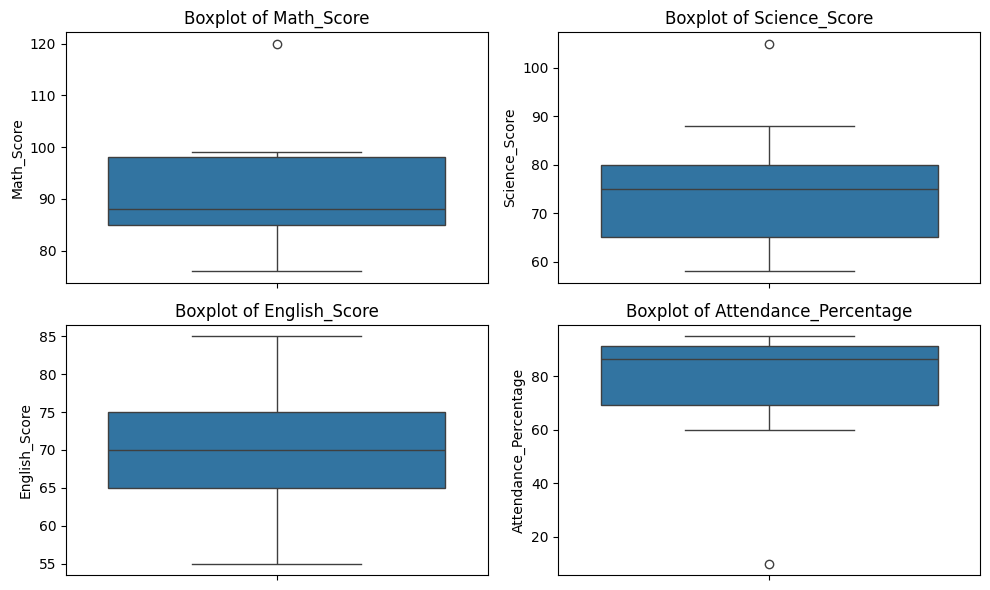

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
for i,col in enumerate(['Math_Score','Science_Score','English_Score','Attendance_Percentage']):
  plt.subplot(2,2,i+1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#finding outlier using IQR
#def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[column] = np.where(df[column] > upper_bound, upper_bound,
#                  np.where(df[column] < lower_bound, lower_bound, df[column]))
#     return df

# # Apply to numeric columns
# for col in ['Math_Score', 'Science_Score', 'Attendance_Percentage']:
#     df = remove_outliers_iqr(df, col)

# print("\nDataset after Handling Outliers:")
# print(df)



In [6]:
#finding outlier using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


handle_outliers_iqr(df, 'Attendance_Percentage')

print(df)

  Stundent_Id     Name  Math_Score  Science_Score  English_Score  \
0          S1      Raj        88.0           78.0           85.0   
1          S2     Riya        76.0           75.0           80.0   
2          S3    Harsh        98.0           80.0           75.0   
3          S4     yash         NaN           60.0           60.0   
4          S5  Pranjal        99.0           65.0           65.0   
5          S6   Pranav       117.5           88.0           70.0   
6          S7     Ansh        87.0            NaN           72.0   
7          S8      Sid        77.0          102.5           68.0   
8          S9     Maan        92.0           58.0           55.0   
9         S10   trisha        85.0           70.0            NaN   

   Attendance_Percentage  
0                 95.000  
1                 90.000  
2                 88.000  
3                 60.000  
4                 65.000  
5                 92.000  
6                 93.000  
7                 35.875  
8       

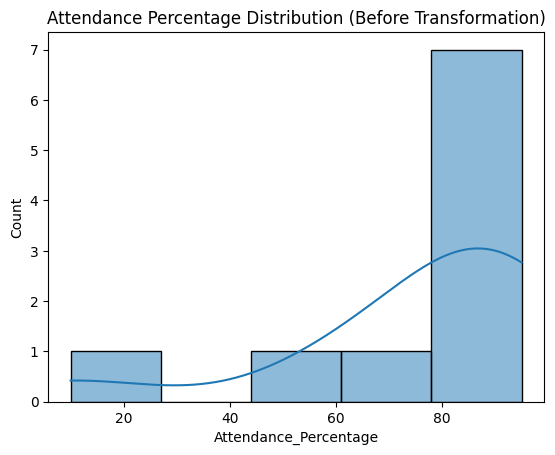

In [ ]:
sns.histplot(df['Attendance_Percentage'], kde=True)
plt.title('Attendance Percentage Distribution (Before Transformation)')
plt.show()

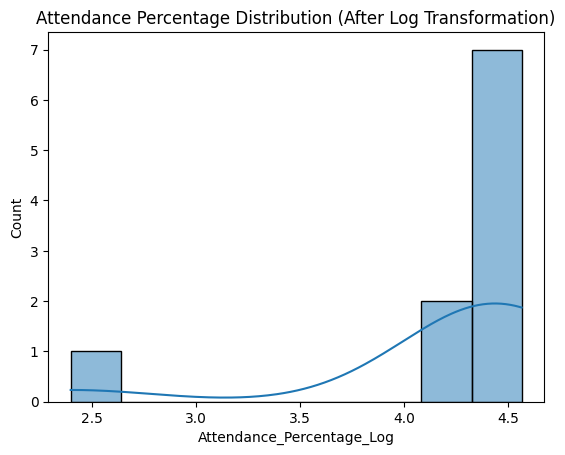

In [ ]:
# Log transform (adding 1 to avoid log(0))
df['Attendance_Percentage_Log'] = np.log(df['Attendance_Percentage'] + 1)

# Plot after transformation
sns.histplot(df['Attendance_Percentage_Log'], kde=True)
plt.title('Attendance Percentage Distribution (After Log Transformation)')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns you want to scale
columns_to_scale = ['Math_Score', 'Science_Score', 'English_Score', 'Attendance_Percentage']

# Create scaler
scaler = MinMaxScaler()

# Apply scaler
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nDataset after Min-Max Scaling:")
print(df_scaled)



Dataset after Min-Max Scaling:
  Stundent_Id     Name  Math_Score  Science_Score  English_Score  \
0          S1      Raj    0.272727       0.425532       1.000000   
1          S2     Riya    0.000000       0.361702       0.833333   
2          S3    Harsh    0.500000       0.468085       0.666667   
3          S4     yash         NaN       0.042553       0.166667   
4          S5  Pranjal    0.522727       0.148936       0.333333   
5          S6   Pranav    1.000000       0.638298       0.500000   
6          S7     Ansh    0.250000            NaN       0.566667   
7          S8      Sid    0.022727       1.000000       0.433333   
8          S9     Maan    0.363636       0.000000       0.000000   
9         S10   trisha    0.204545       0.255319            NaN   

   Attendance_Percentage  Attendance_Percentage_Log  
0               1.000000                   4.564348  
1               0.941176                   4.510860  
2               0.917647                   4.488636  
3  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_to_scale=['Math_Score', 'Science_Score', 'English_Score','Attendance_Percentage']

Scaler= MinMaxScaler()

df_scaled=df.copy()
df_scaled[column_to_scale]=Scaler.fit_tranform(df[column_to_scale])

print("\nDataset after Min-Max Scaling:")
print(df_scaled)